In [2]:
# import matplotlib.pyplot as plt
import pandas as pd
# from scipy.interpolate import interp1d
# import os
# import sys
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt    
# import re
import pickle
# import matplotlib.patches as mpatches
# from statsmodels.graphics.mosaicplot import mosaic
# from tabulate import tabulate
import seaborn as sns

# sys.path.insert(1, '../')
# from Prepare_Events_Functions import *
# from Plot_events_functions import *

# sys.path.insert(1, '../../ProcessEvents')
# from Create_Profiles_Functions import *

In [3]:
color_mapping_loading = {
    'F2': (0.0, 0.0, 1.0, 0.6),    # darkblue with 0.6 alpha
    'F1': (0.0, 0.6902, 1.0, 0.6), # deepskyblue with 0.6 alpha
    'C': (0.5, 0.5, 0.5, 0.6),     # grey with 0.6 alpha
    'B1': (0.8039, 0.0, 0.0, 0.6), # indianred with 0.6 alpha
    'B2': (0.5451, 0.0, 0.0, 0.6)}  # darkred with 0.6 alpha

color_mapping_seasons = {
    'Summer': (1.0, 0.6471, 0.0, 0.6), # orange with 0.6 alpha
    'Winter': (0.0, 0.0, 1.0, 0.6)}     # blue with 0.6 alpha}

color_mapping_timeperiod = {
    'Present': (1.0, 0.6471, 0.0, 0.6), # orange with 0.6 alpha
    'Future': (0.0, 0.0, 1.0, 0.6)}     # blue with 0.6 alpha}

quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_cats_loading = ['F2','F1', 'C', 'B1', 'B2']
n= 5
quintile_cats_season = ['Winter', 'Summer']

present_future_lookup = {'bc005': 'Present','bc006': 'Present','bc007': 'Present','bc009': 'Present','bc010': 'Present',
                         'bc011': 'Present', 'bc012': 'Present','bc013': 'Present','bc015': 'Present','bc016': 'Present', 
                         'bc017': 'Present','bc018': 'Present',
                        'nimrod': 'NIMROD',
                        'bb189': 'Future', 'bb192': 'Future','bb195': 'Future','bb198': 'Future','bb201': 'Future',
                        'bb204': 'Future','bb208': 'Future','bb211': 'Future','bb216': 'Future','bb219': 'Future',
                        'bb222': 'Future', 'bb225': 'Future'}

# Read in data
For events with n data points which is a multiple of 5

ADD THIS dataframes['bc006']['Loading_profile_molly'] = dataframes['bc006']['max_quintile_molly'].map(quintile_mapping)

In [4]:
# Define the list of identifiers
ids = ['nimrod', 
       'bc005', 'bc006', 'bc007', 'bc009', 'bc010','bc011', 'bc012','bc013','bc015', 'bc016', 'bc017', 'bc018',
       'bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211','bb216','bb219','bb222','bb225']

# Define the corresponding labels for each identifier
labels = [f'UKCP18_present ({id})' if present_future_lookup[id] == 'Present' else f'UKCP18_future ({id})' if present_future_lookup[id] == 'Future' else 'NIMROD' for id in ids]

In [ ]:
present_ids = [id for id in ids if present_future_lookup.get(id) == 'Present']
present_dataframes = pd.concat([dataframes[id] for id in present_ids], ignore_index=True)

future_ids = [id for id in ids if present_future_lookup.get(id) == 'Future']
future_dataframes = pd.concat([dataframes[id] for id in future_ids], ignore_index=True)

In [570]:
# Dictionary to store the dataframes
# dataframes = {}
# dataframes_summer = {}
# dataframes_shortdurations = {}
# dataframes_veryshortdurations ={}
# dataframes_lessshortdurations = {}
# dataframes_longdurations = {}
# dataframes_divisible_by5 = {}
# dataframes_inclnulls = {}

for id in ids:
    if present_future_lookup[id] == 'Present':
        file_path = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Present/{id}/df_nonulls.pkl"
        file_path_inclnulls = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Present/{id}/df.pkl"
    elif present_future_lookup[id] == 'Future':
        file_path = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Future/{id}/df_nonulls.pkl"
        file_path_inclnulls = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/Future/{id}/df.pkl"
    elif present_future_lookup[id] == 'NIMROD' :  
        file_path = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/NIMROD_30mins/WholeYear/df_nonulls.pkl"
        file_path_inclnulls = f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/NIMROD_30mins/WholeYear/df.pkl"
    
    # Load the dataframe from the pickle file
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
    
    # Apply the month extraction function
    df['month'] = df['times'].apply(extract_month)
    df['Loading_profile_steef'] =df['max_quintile_steef'].map(quintile_mapping)
    
    # Store the dataframe in the dictionary with the id as the key
    dataframes[id] = df
    dataframes_divisible_by5[id]  = df[df['precip'].apply(is_multiple_of_5)]
    dataframes_summer[id] = df[df["season"]=='Summer']
    dataframes_shortdurations[id] = df[df["duration"]<6]
    dataframes_veryshortdurations[id] = df[df["duration"]<3]
    dataframes_lessshortdurations[id] = df[df["duration"]<10]
    dataframes_longdurations[id] = df[df["duration"]>=6]
        
    ###############################
    ########## Data including Nulls
    ###############################
    # Load the dataframe from the pickle file
    with open(file_path_inclnulls, 'rb') as f:
        df = pickle.load(f)
    dataframes_inclnulls[id] = df

### Create dataframes for plotting boxplots

In [736]:
combined_df_seasons = prepare_combined_data(dataframes_inclnulls, 'season', ids)
combined_df_loading = prepare_combined_data(dataframes, 'Loading_profile_molly', ids)
combined_df_present =combined_df[combined_df['TimePeriod']=='Present']   
combined_df_shortdurations_loading = prepare_combined_data(dataframes_shortdurations, 'Loading_profile_molly', ids)
combined_df_veryshortdurations_loading = prepare_combined_data(dataframes_veryshortdurations, 'Loading_profile_molly', ids)
combined_df_lessshortdurations_loading = prepare_combined_data(dataframes_lessshortdurations, 'Loading_profile_molly', ids)

combined_df_durations_notpersonalised = prepare_combined_data(dataframes, 'DurationRange_notpersonalised', ids)
combined_df_durations_personalised = prepare_combined_data(dataframes, 'DurationRange_personalised', ids)
combined_df_durations = prepare_combined_data(dataframes, 'duration', ids)
combined_df_durations_present =combined_df_durations[combined_df_durations['TimePeriod']=='Present'] 
combined_df_durations_future =combined_df_durations[combined_df_durations['TimePeriod']=='Future'] 

combined_df_loading_summer = prepare_combined_data(dataframes_summer, 'Loading_profile_molly', ids)

In [ ]:
def keep_top_ten_percent(profiles, durations, real_durations, volumes):
    # Calculate the cutoff for the top 10%
    cutoff = np.percentile(volumes, 90)

    # Get indices of values in the top 10%
    top_10_percent_indices = [i for i, x in enumerate(volumes) if x >= cutoff]

    # Extract corresponding values from the other list
    top_10_percent_profiles = [profiles[i] for i in top_10_percent_indices]
    top_10_percent_durations = [durations[i] for i in top_10_percent_indices]
    top_10_percent_volumes = [volumes[i] for i in top_10_percent_indices]
    top_10_percent_real_durations = [real_durations[i] for i in top_10_percent_indices]
    
    return top_10_percent_profiles, top_10_percent_durations, top_10_percent_real_durations, top_10_percent_volumes

In [627]:
for key, df in dataframes.items():
    print(f"There are {len(df)} of {key} (and {len(df)/19})")

There are 87987 of nimrod (and 4630.894736842105)
There are 119456 of bc005 (and 6287.1578947368425)
There are 114179 of bc006 (and 6009.421052631579)
There are 113784 of bc007 (and 5988.631578947368)
There are 110583 of bc009 (and 5820.1578947368425)
There are 111837 of bc010 (and 5886.1578947368425)
There are 112510 of bc011 (and 5921.578947368421)
There are 114444 of bc012 (and 6023.368421052632)
There are 113831 of bc013 (and 5991.105263157895)
There are 114438 of bc015 (and 6023.0526315789475)
There are 115173 of bc016 (and 6061.736842105263)
There are 169562 of bc017 (and 8924.315789473685)
There are 114853 of bc018 (and 6044.894736842105)
There are 111827 of bb189 (and 5885.631578947368)
There are 111699 of bb192 (and 5878.894736842105)
There are 112070 of bb195 (and 5898.421052631579)
There are 107246 of bb198 (and 5644.526315789473)
There are 107561 of bb201 (and 5661.105263157895)
There are 110869 of bb204 (and 5835.210526315789)
There are 114069 of bb208 (and 6003.6315789473

## Do durations of AMAX events change in the future?

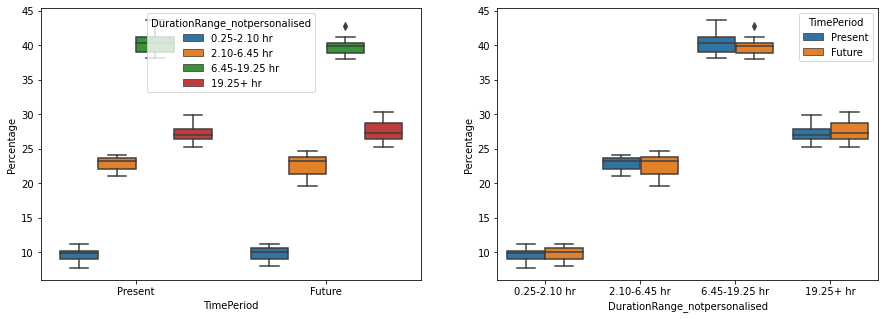

In [484]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(ax=axs[0],data=combined_df_durations_notpersonalised, x='TimePeriod', y='Percentage', hue='DurationRange_notpersonalised');
sns.boxplot(ax=axs[1],data=combined_df_durations_notpersonalised, x='DurationRange_notpersonalised', y='Percentage', hue='TimePeriod');

## Distribution of distributions for NIMROD vs UKCP18 present vs UKCP18 future

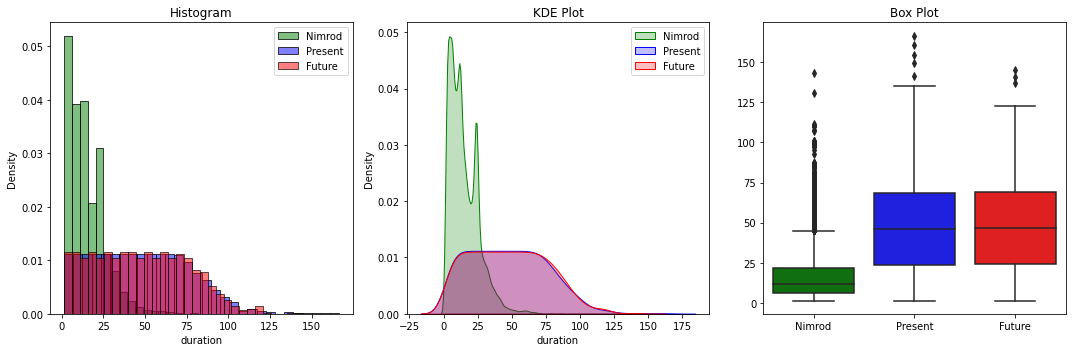

In [522]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram
sns.histplot(dataframes['nimrod']['duration'], bins=30, color='green', alpha=0.5, label='Nimrod', ax=axes[0], stat='density')
sns.histplot(combined_df_durations_present['duration'], bins=30, color='blue', alpha=0.5, label='Present', ax=axes[0], stat='density')
sns.histplot(combined_df_durations_future['duration'], bins=30, color='red', alpha=0.5, label='Future', ax=axes[0], stat='density')
axes[0].set_title('Histogram')
axes[0].legend()

# KDE Plot
sns.kdeplot(dataframes['nimrod']['duration'], color='green', shade=True, label='Nimrod', ax=axes[1])
sns.kdeplot(combined_df_durations_present['duration'], color='blue', shade=True, label='Present', ax=axes[1])
sns.kdeplot(combined_df_durations_future['duration'], color='red', shade=True, label='Future', ax=axes[1])
axes[1].set_title('KDE Plot')
axes[1].legend()

# Box Plot
sns.boxplot(data=[dataframes['nimrod']['duration'], combined_df_durations_present['duration'], 
                  combined_df_durations_future['duration']], palette=['green','blue', 'red'], ax=axes[2])
axes[2].set_xticklabels(['Nimrod','Present', 'Future'])
axes[2].set_title('Box Plot')

plt.tight_layout()
plt.show()


### Mosaic plot comparing seasons

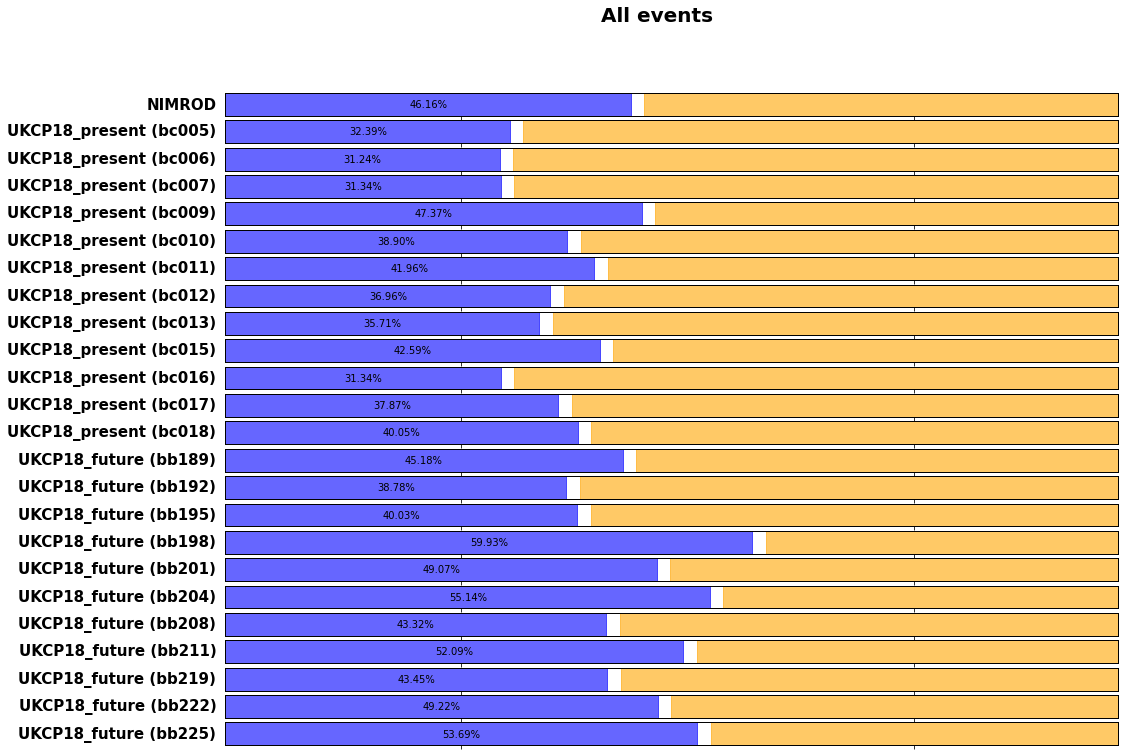

In [269]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(ids), figsize=(16, 12), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(ids):
    create_single_variable_mosaic_plot_pctlabels(
        axs[i], dataframes[id], 'season', quintile_cats_season, color_mapping_seasons,  labels[i])

# Add the overall title
fig.suptitle('All events', fontweight="bold", fontsize=20);

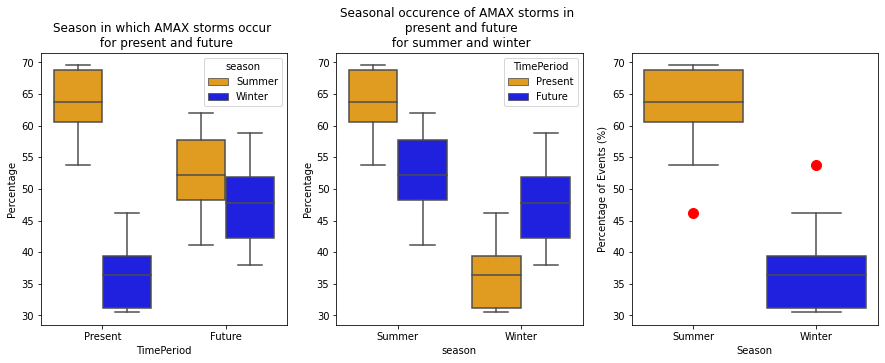

In [290]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(ax=axs[0],data=combined_df_seasons, x='TimePeriod', y='Percentage', hue='season',
#             order=quintile_cats_season,
                palette =color_mapping_seasons);
axs[0].set_title('Season in which AMAX storms occur \n for present and future')

sns.boxplot(ax=axs[1],data=combined_df_seasons, x='season', y='Percentage', hue='TimePeriod',
                palette =color_mapping_timeperiod);
axs[1].set_title('Seasonal occurence of AMAX storms in \n present and future\n for summer and winter')

combined_df_seasons_present =combined_df_seasons[combined_df_seasons['TimePeriod']=='Present']     
# Create the box plot for the UKCP18 ensemble members' percentages
sns.boxplot(x='season', y='Percentage', data=combined_df_seasons_present, ax=axs[2], 
           palette=color_mapping_seasons, showmeans=False)

# Overlay the Nimrod values as percentage points
nimrod_data = dataframes['nimrod']['season'].value_counts(normalize=True).reindex(quintile_cats_season, fill_value=0)
nimrod_values = nimrod_data.index
nimrod_percentages = nimrod_data.values * 100  # Convert to percentage

# Plot the Nimrod values
for i, category in enumerate(nimrod_values):
    nimrod_percentage = nimrod_percentages[i]
    axs[2].scatter(i, nimrod_percentage, color='red', s=100, zorder=5, label='NIMROD' if i == 0 else "")

# Add titles and labels
# axs[2].set_title('Comparison of seasonal split between \n UKCP18 Ensembles and NIMROD',fontweight='bold')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Percentage of Events (%)');

### Mosaic plot comparing loading

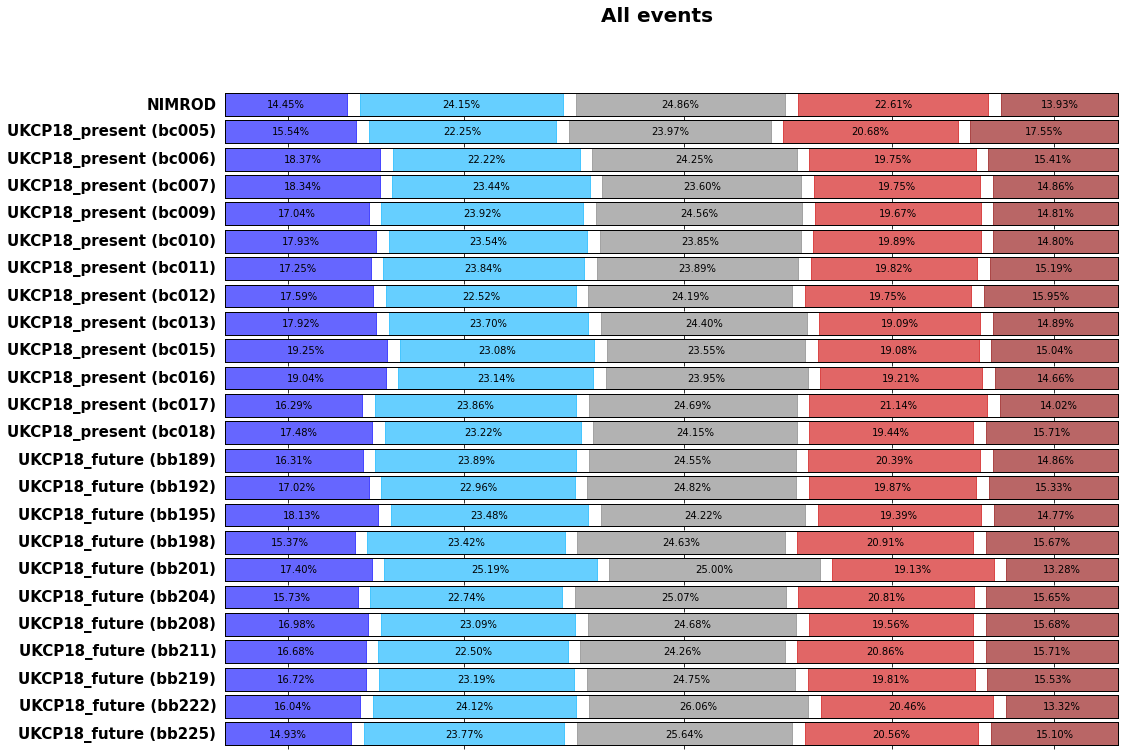

In [270]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(ids), figsize=(16, 12), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], dataframes[id], 'Loading_profile_steef', 
        quintile_cats_loading, color_mapping_loading,  labels[i])

# Add the overall title
fig.suptitle('All events', fontweight="bold", fontsize=20);

In [11]:
# https://stackoverflow.com/questions/65709684/grouping-boxplots-in-seaborn-coming-from-multiple-dataframes

### Combine present and future into one dataframe

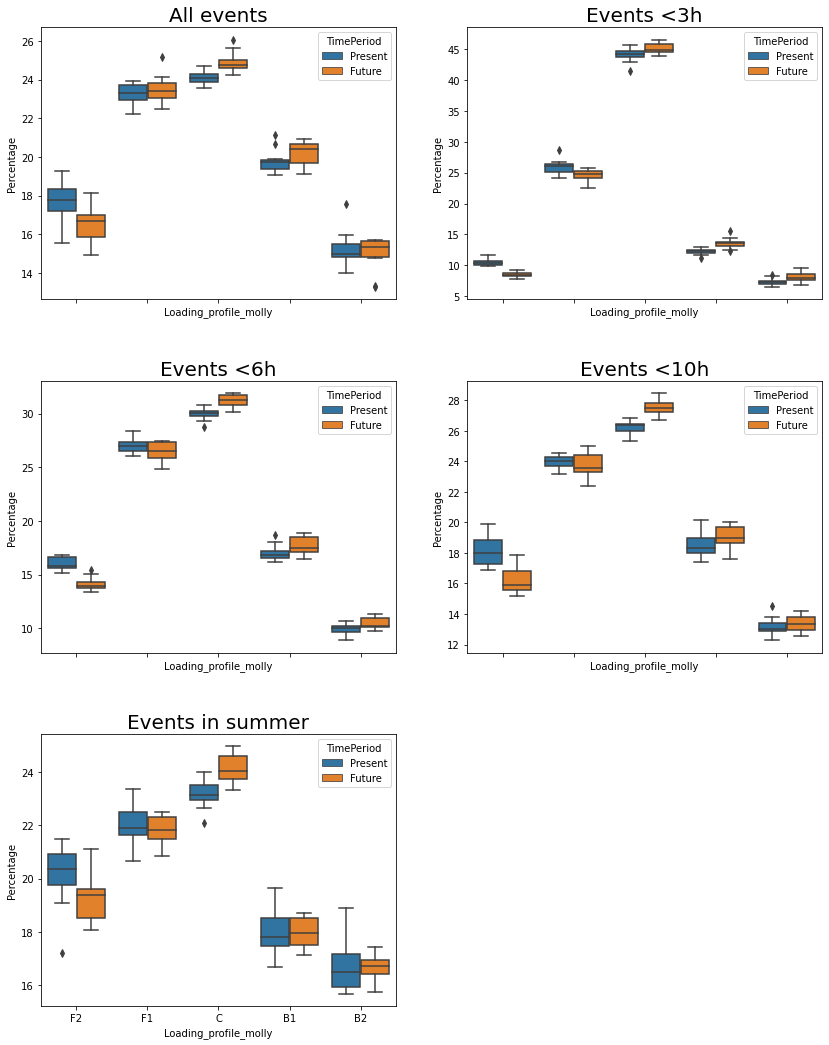

In [745]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(14, 18), sharex=True)
fig.subplots_adjust(hspace=0.3)
sns.boxplot(ax=axs[0,0],data=combined_df_loading, x='Loading_profile_molly', y='Percentage', hue='TimePeriod',
            order=['F2', 'F1', 'C', 'B1', 'B2'])
axs[0,0].set_title('All events', fontsize=20)
sns.boxplot(ax=axs[0,1],data=combined_df_veryshortdurations_loading, x='Loading_profile_molly', y='Percentage', hue='TimePeriod',
            order=['F2', 'F1', 'C', 'B1', 'B2'])
axs[0,1].set_title('Events <3h', fontsize=20)
sns.boxplot(ax=axs[1,0],data=combined_df_shortdurations_loading, x='Loading_profile_molly', y='Percentage', hue='TimePeriod',
            order=['F2', 'F1', 'C', 'B1', 'B2']);
axs[1,0].set_title('Events <6h', fontsize=20)
sns.boxplot(ax=axs[1,1],data=combined_df_lessshortdurations_loading, x='Loading_profile_molly', y='Percentage', hue='TimePeriod',
            order=['F2', 'F1', 'C', 'B1', 'B2'])
axs[1,1].set_title('Events <10h', fontsize=20);
sns.boxplot(ax=axs[2,0],data=combined_df_loading_summer, x='Loading_profile_molly', y='Percentage', hue='TimePeriod',
            order=['F2', 'F1', 'C', 'B1', 'B2'])
axs[2,0].set_title('Events in summer', fontsize=20);
fig.delaxes(axs[2, 1])

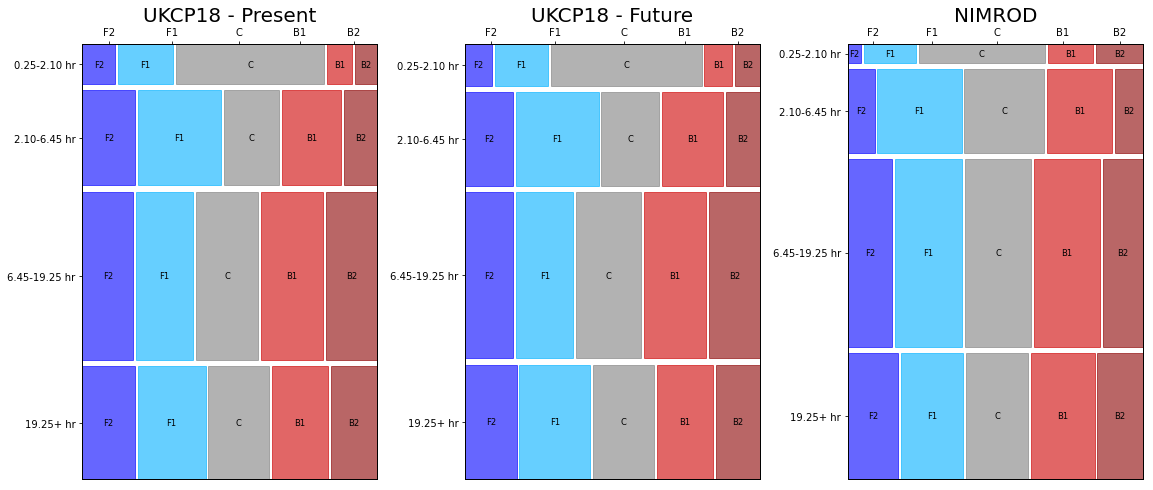

In [746]:
fig, axs = plt.subplots(ncols =3, figsize=(19,8))
fig.subplots_adjust(wspace=0.3)
create_mosaic_plot(axs[0],present_dataframes , quintile_cats_loading, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='Loading_profile_steef')
axs[0].set_title('UKCP18 - Present', fontsize=20)
create_mosaic_plot(axs[1],future_dataframes , quintile_cats_loading, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='Loading_profile_steef')
axs[1].set_title('UKCP18 - Future', fontsize=20)
create_mosaic_plot(axs[2],dataframes['nimrod'], quintile_cats_loading, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='Loading_profile_steef')
axs[2].set_title('NIMROD', fontsize=20);

# Profiles

Why does it feel like there are a lot more profiles for these ensemble members than in RVH?

In [749]:
duration_bin_1 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='0.25-2.10 hr']
duration_bin_2 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='2.10-6.45 hr']
duration_bin_3 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='6.45-19.25 hr']
duration_bin_4 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='19.25+ hr']

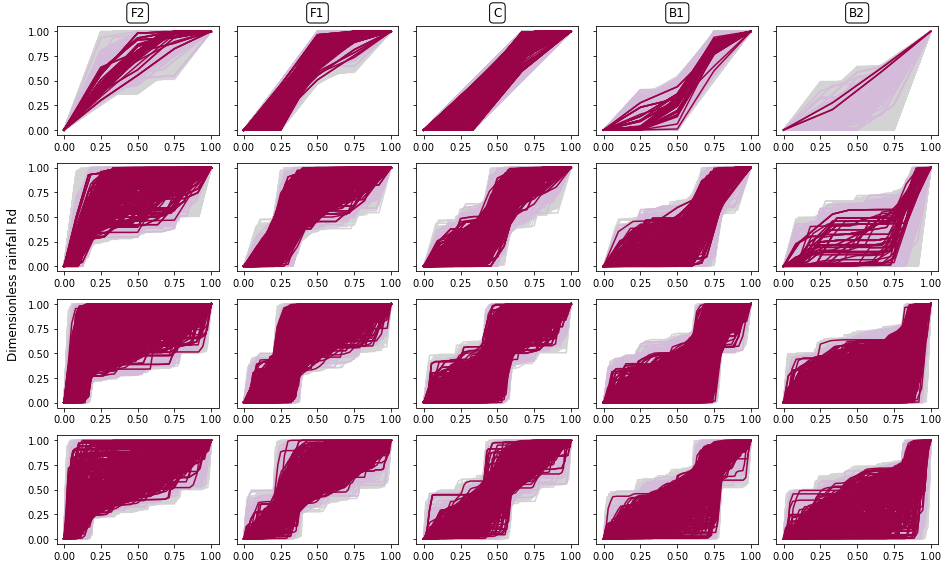

In [750]:
# Prepare the subplots
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(13, 8), sharey=True)

# Plot df in the first row and df2 in the second row
plot_profiles_by_percentile(axs[0, :], duration_bin_1)  # First row
plot_profiles_by_percentile(axs[1, :], duration_bin_2)  # Second row
plot_profiles_by_percentile(axs[2, :], duration_bin_3)  # First row
plot_profiles_by_percentile(axs[3, :], duration_bin_4)  # Second row

# Add column labels with boxes
column_labels = ['F2', 'F1', 'C', 'B1', 'B2']
for ax, label in zip(axs[0, :], column_labels):
    ax.set_title(label, pad=10, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.3'})

# Adjust layout and display the figure
fig.tight_layout()
fig.supylabel('Dimensionless rainfall Rd', x=-0.01)
plt.show()

# Seasonality of AMAX events
There are more events in summer in UKCP18 than in NIMROD.  
There are more events in summer in UKCP18 present than UKCP18 future.

This includes events that are too short to be used in the profiling.

The only reason I can think for this, is missing data in NIMROD. I can't think of anyway to check this.

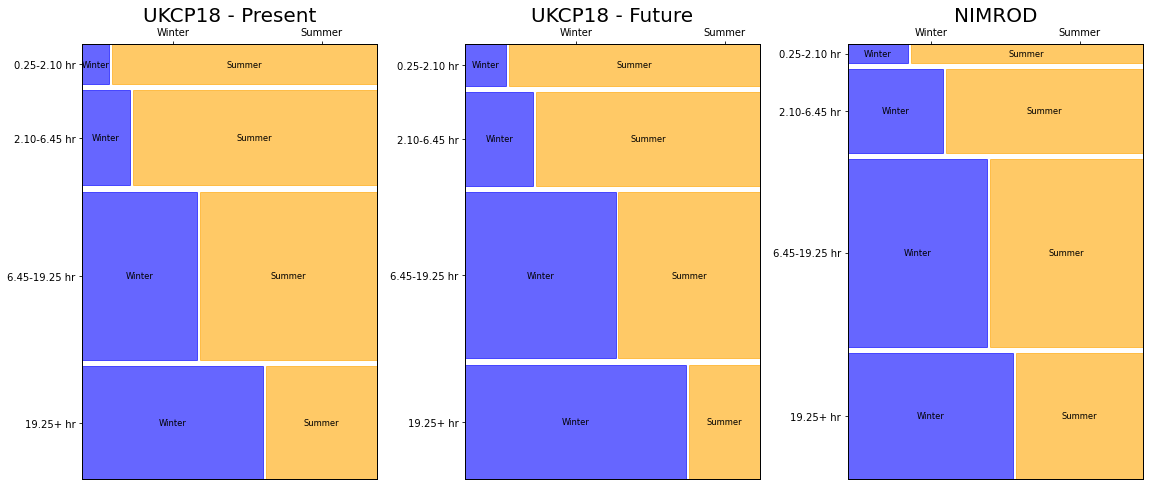

In [722]:
fig, axs = plt.subplots(ncols =3, figsize=(19,8))
fig.subplots_adjust(wspace=0.3)
create_mosaic_plot(axs[0],present_dataframes , quintile_cats_season, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='season')
axs[0].set_title('UKCP18 - Present', fontsize=20)
create_mosaic_plot(axs[1],future_dataframes , quintile_cats_season, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='season')
axs[1].set_title('UKCP18 - Future', fontsize=20)
create_mosaic_plot(axs[2],dataframes['nimrod'], quintile_cats_season, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='season')
axs[2].set_title('NIMROD', fontsize=20);

### Plot profiles

In [6]:
def create_kmeans_centroids(data, num_clusters):
    data = data[data['interpolated12_incremental_rainfall'].notna()]
    profiles = np.array(data['interpolated12_incremental_rainfall'].tolist())
    # Create and fit the model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(profiles)

    # Get cluster labels for each profile
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids

def plot_centroids(axs, row, centroids, color):
    for num, centroid_cumulative in enumerate(centroids):

        # Time in hours
        time_hours = np.arange(len(centroid_cumulative))  

        # Convert cumulative to intensity (mm/hour)
        #intensity = np.diff(centroid_cumulative) / np.diff(time_hours)
        intensity = centroid_cumulative
        # Calculate average intensity
        average_intensity = np.sum(intensity) / (time_hours[-1] - time_hours[0])

        # Normalize intensity by average intensity
        normalized_intensity = intensity / average_intensity

        # Find portion which is heaviest
        # heaviest_segment = categorize_normalized_rainstorm(centroid_cumulative)
        quintile_with_max_value = find_quintile_with_max_value(intensity)
        i = quintile_with_max_value
        
        axs[row, i].plot(time_hours, normalized_intensity, color=color, linestyle='-')
        
        if row == 0:
            axs[row, i].set_title(f'Quintile {i + 1}')  

In [8]:
def keep_top_ten_percent(profiles, durations, real_durations, volumes):
    # Calculate the cutoff for the top 10%
    cutoff = np.percentile(volumes, 90)

    # Get indices of values in the top 10%
    top_10_percent_indices = [i for i, x in enumerate(volumes) if x >= cutoff]

    # Extract corresponding values from the other list
    top_10_percent_profiles = [profiles[i] for i in top_10_percent_indices]
    top_10_percent_durations = [durations[i] for i in top_10_percent_indices]
    top_10_percent_volumes = [volumes[i] for i in top_10_percent_indices]
    top_10_percent_real_durations = [real_durations[i] for i in top_10_percent_indices]
    
    return top_10_percent_profiles, top_10_percent_durations, top_10_percent_real_durations, top_10_percent_volumes

def run_kmeans_clustering (num_clusters, profiles, durations):
    # Create and fit the model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(profiles)

    # Get cluster labels for each profile
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    df = pd.DataFrame({'cluster_num': labels, 'duration': durations})
    df['duration'] = pd.to_numeric(df['duration'])
    df.groupby('cluster_num')['duration'].mean()
    return df

def create_kmeans_centroids(data, num_clusters):
    profiles = np.array(data['irain_profile_12'].tolist())
    # Create and fit the model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(profiles)

    # Get cluster labels for each profile
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids

In [75]:
def create_irain_profile(precip,leading_trailing_zeros, bins =12):
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(precip)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_cumulative_rainfall, interpolated_times = interpolate_rainfall(dimensionless_cumulative_rainfall,12)
    interpolated_incremental_rainfall = create_incremental_event(interpolated_cumulative_rainfall)

    irain = find_intensity_as_proportion_of_mean_event(interpolated_incremental_rainfall)

    leading_trailing_zeros = True
    len_intensity = len(irain)
    # Time points: start of event, end of event, midpoint of the intervals

    if leading_trailing_zeros == True:
        irain = np.append([0], irain)
        irain = np.append(irain, [0]) 

        times = np.hstack((np.array([0.0]),
                (np.arange(len_intensity) + 0.5) / len_intensity,
                np.array([1.0])))

    elif leading_trailing_zeros == False:

        times = np.arange(len_intensity) + 0.5 / len_intensity      
    
    return irain, dimensionless_cumulative_rainfall, dimensionless_times

In [76]:
def create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times):
    # Normalize the cumulative rainfall by the total event depth
    total_event_depth = cumulative_rainfall[-1]
    normalized_cumulative_rainfall = np.array(cumulative_rainfall) / total_event_depth

    # Normalize the cumulative rainfall times by the total event time
    total_event_time = cumulative_rainfall_times[-1]
    normalized_cumulative_rainfall_times = np.array(cumulative_rainfall_times) / total_event_time
    
    return normalized_cumulative_rainfall, normalized_cumulative_rainfall_times


In [77]:
df=dataframes['bc005']
df[['irain_profile_12_without0s', 'dimensionless_cumulative_rainfall', 'dimensionless_times']] = df['precip'].apply(
    lambda x: pd.Series(create_irain_profile(x, True, 12)))

In [ ]:

rvh_profiles = pd.read_csv("../CatchmentAnalysis/CreateSyntheticRainfallEvents/ObservedProfiles/kmeans_15clustersPerDur.csv")
# # Just keep prain (proportion of rainfall in each timestep)
rvh_profiles = rvh_profiles[rvh_profiles['Variable'] == 'irain']
rvh_profiles = rvh_profiles[rvh_profiles['Duration'] == '[2:10 - 6:45) hr']

for cluster_num in range(1,14):
    cluster1=rvh_profiles[rvh_profiles['Cluster']==cluster_num]
    cluster1 = cluster1[:-2]
    quintile_with_max_value = find_quintile_with_max_value(np.array(cluster1['Mean']))
    axs[quintile_with_max_value].plot(range(len(cluster1)),cluster1['Mean'], linewidth = 2, color='purple')  
    
axs[-1].annotate("0.25-2.10 hrs", xy=(1.05, 0.5), xycoords='axes fraction',
                      fontsize='large', ha='left', va='center', rotation=90);

In [10]:
def plot_centroids(axs, row, centroids, color):
    for num, centroid_cumulative in enumerate(centroids):

        # Time in hours
        time_hours = np.arange(len(centroid_cumulative))  

        # Find portion which is heaviest
        # heaviest_segment = categorize_normalized_rainstorm(centroid_cumulative)
        quintile_with_max_value = find_quintile_with_max_value(centroid_cumulative)
        i = quintile_with_max_value
        
        axs[row, i].plot(time_hours, centroid_cumulative, color=color, linestyle='-')
        
        if row == 0:
            axs[row, i].set_title(f'Quintile {i + 1}')  

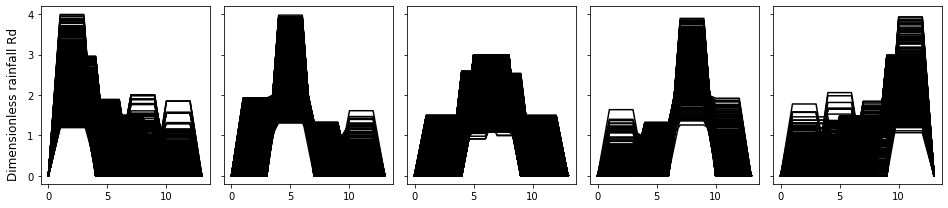

In [43]:
# Prepare the subplots
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(13, 3), sharey=True)

# Example profiles (using random synthetic data for demonstration)
np.random.seed(0)  # For reproducibility


for index, row in bc005[:10000].iterrows():
    profile = row['irain_profile_12']
    heaviest_segment = row['max_quintile_steef'] -1
    axs[heaviest_segment].plot(profile, label=f'Profile with heaviest in segment {heaviest_segment + 1}',
                              color='black')

# Adjust the layout
fig.tight_layout()
fig.supylabel('Dimensionless rainfall Rd', x=- 0.01)
plt.show()

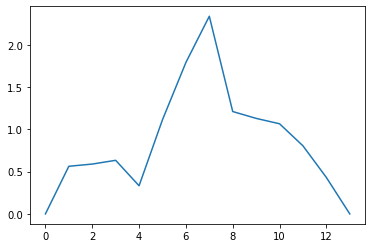

In [40]:
bc005 = dataframes['bc005']
plt.plot(bc005['irain_profile_12_Steef'][len(bc005)-2])

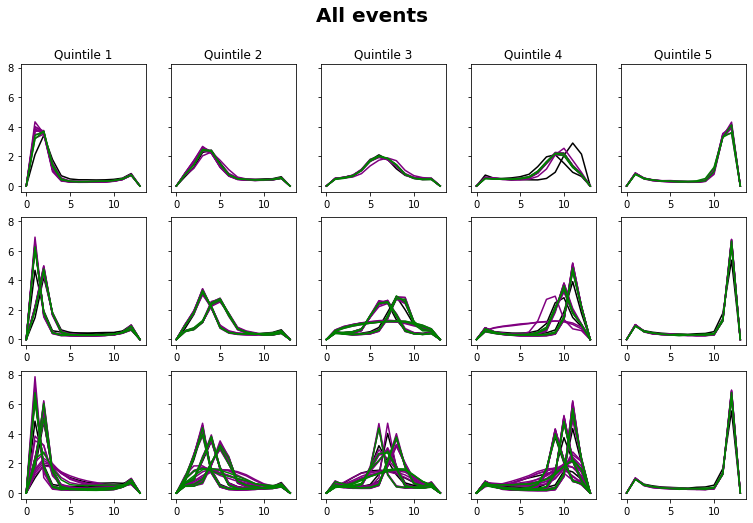

In [17]:
# Create the subplots
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(13, 8), sharey=True)

# Loop over each id and create the plots
for i, id in enumerate(ids):
    timeperiod =present_future_lookup[id]
    
    for ax_num, num_clusters in enumerate([5,10,15]):

        labels, centroids = create_kmeans_centroids(dataframes[id], num_clusters)

        if timeperiod =='NIMROD':
            color = 'black'
        elif timeperiod == 'Present':
            color = 'Purple'
        elif timeperiod == 'Future':
            color = 'Green'

        plot_centroids(axs,ax_num, centroids, color)
    
# Add the overall title
fig.suptitle('All events', fontweight="bold", fontsize=20);

In [ ]:
rvh_profiles = pd.read_csv("../CatchmentAnalysis/CreateSyntheticRainfallEvents/ObservedProfiles/kmeans_15clustersPerDur.csv")
# # Just keep prain (proportion of rainfall in each timestep)
rvh_profiles = rvh_profiles[rvh_profiles['Variable'] == 'irain']
rvh_profiles = rvh_profiles[rvh_profiles['Duration'] == '[2:10 - 6:45) hr']

for cluster_num in range(1,14):
    cluster1=rvh_profiles[rvh_profiles['Cluster']==cluster_num]
    cluster1 = cluster1[:-2]
    quintile_with_max_value = find_quintile_with_max_value(np.array(cluster1['Mean']))
    axs[quintile_with_max_value].plot(range(len(cluster1)),cluster1['Mean'], linewidth = 2, color='purple')  
    
axs[-1].annotate("0.25-2.10 hrs", xy=(1.05, 0.5), xycoords='axes fraction',
                      fontsize='large', ha='left', va='center', rotation=90);